# 06-morphometry-cognition-exploration.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Last updated: 2024-12-10

In [18]:
import os
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import shutil
import warnings
import datetime
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

In [19]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:27 PDT 2024; root:xnu-11215.41.3~2/RELEASE_X86_64)


#### Read data with information about demographics, brain morphometry and RBANS for 78 participants

Using the IBS_SSS imputed fata set (78x48) produced in the previous<br> `05-predicting-IBS-vs-HC-from-morphometric-measures.ipynb` notebook

In [20]:
df = pd.read_csv('../data/demographics_fs7_rbans_IBS_SSS_imputed_78x48.csv')
df

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,Fullscale_RBANS,Memory_Index,Visuospatial_Index,Verbalskills_Index,Attention_Index,Recall_Index,IBS_SSS,Age,Gender,Education
0,BGA_046,IBS,1.743419e+06,0.009292,0.034808,0.005048,0.002424,0.003358,0.001248,0.003099,...,100,80,102,93,97,86,195.0,38,M,12.0
1,BGA_047,IBS,1.360311e+06,0.009960,0.039399,0.005439,0.002127,0.002992,0.001318,0.002999,...,116,109,107,97,115,126,325.0,19,F,13.0
2,BGA_048,IBS,1.350452e+06,0.011099,0.037770,0.005755,0.002750,0.004094,0.001498,0.003533,...,95,83,84,113,103,100,326.0,34,F,13.0
3,BGA_050,IBS,1.595000e+06,0.010458,0.030902,0.005803,0.002675,0.003622,0.001322,0.002925,...,87,86,97,90,98,86,357.0,44,F,18.0
4,BGA_051,IBS,1.645577e+06,0.010128,0.034373,0.005717,0.002209,0.003332,0.001317,0.002864,...,100,105,90,97,108,100,293.0,38,M,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.399586e+06,0.011516,0.034967,0.005952,0.002364,0.003272,0.001358,0.002845,...,93,89,90,118,108,82,56.0,19,F,NaN
74,BGA_167,HC,1.394849e+06,0.011416,0.031906,0.005171,0.002180,0.003092,0.001154,0.002759,...,97,83,85,116,113,23,25.0,52,F,NaN
75,BGA_168,HC,1.259360e+06,0.012970,0.041197,0.006277,0.003057,0.004054,0.001500,0.003182,...,100,100,103,107,86,104,21.0,50,F,NaN
76,BGA_171,HC,1.609011e+06,0.010545,0.040919,0.005930,0.002501,0.003863,0.001624,0.002967,...,96,89,102,85,101,110,32.0,21,M,NaN


In [21]:
df.describe()

,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,Left-Amygdala,Left-Accumbens-area,...,TotalGrayVol,Fullscale_RBANS,Memory_Index,Visuospatial_Index,Verbalskills_Index,Attention_Index,Recall_Index,IBS_SSS,Age,Education
count,7.800000e+01,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,69.000000
mean,1.474885e+06,0.010762,0.037309,0.005308,0.002486,0.003651,0.001389,0.002942,0.001221,0.000433,...,0.457284,95.128205,93.320513,95.782051,99.435897,96.474359,97.230769,182.935897,35.384615,16.036232
std,1.539288e+05,0.001054,0.003574,0.000490,0.000313,0.000387,0.000123,0.000254,0.000123,0.000071,...,0.026734,13.936180,16.765374,11.189800,13.789314,15.908606,18.112149,133.922476,11.395181,1.991376
min,1.215809e+06,0.008647,0.030082,0.004016,0.001814,0.002812,0.001034,0.002341,0.000956,0.000273,...,0.406023,55.000000,45.000000,64.000000,57.000000,68.000000,23.000000,0.000000,19.000000,12.000000
25%,1.377170e+06,0.010152,0.034705,0.004947,0.002222,0.003359,0.001317,0.002767,0.001125,0.000385,...,0.439040,87.000000,83.000000,90.000000,90.000000,88.000000,86.000000,29.750000,25.000000,15.000000
50%,1.448416e+06,0.010778,0.037246,0.005370,0.002492,0.003626,0.001385,0.002955,0.001225,0.000437,...,0.458599,95.000000,92.000000,96.000000,97.000000,97.000000,96.500000,217.000000,33.500000,16.000000
75%,1.560284e+06,0.011297,0.039795,0.005648,0.002673,0.003881,0.001475,0.003098,0.001314,0.000486,...,0.475005,104.000000,107.250000,105.000000,113.000000,103.000000,108.000000,269.250000,43.000000,18.000000
max,1.888063e+06,0.013654,0.047473,0.006335,0.003170,0.004655,0.001724,0.003533,0.001591,0.000577,...,0.542009,123.000000,128.000000,114.000000,130.000000,155.000000,139.000000,418.000000,61.000000,21.000000


### Age and gender distribution  and morphometric differences

In [22]:
print('Age distribution:')
df.groupby(['Gender', 'Group']).Age.describe().round(3)

Age distribution:


count    mean     std   min   25%   50%    75%   max
Gender Group                                                      
F      HC      20.0  36.900  13.630  19.0  23.0  37.5  49.25  58.0
       IBS     38.0  34.947  11.109  19.0  26.5  33.0  41.75  61.0
M      HC       9.0  31.444  12.177  21.0  22.0  26.0  38.00  58.0
       IBS     11.0  37.364   6.932  28.0  32.0  38.0  42.50  48.0

In [23]:
# Make a cross tabulation of Gender and Group with marginals
pd.crosstab(df['Gender'], df['Group'], margins=True)

Group,HC,IBS,All
Gender,,,
F,20,38,58
M,9,11,20
All,29,49,78


#### Demographics and other information about the cohort

In [24]:
 LATEX = False   # Latex tables to file

def safe_median_iqr(x):
    x = pd.to_numeric(x, errors='coerce')
    median = x.median()
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return pd.Series({'median': median, 'iqr': iqr})

def safe_agg(group):
    age_stats = safe_median_iqr(group['Age'])
    ibs_sss_stats = safe_median_iqr(group['IBS_SSS'])
    gender_dist = group['Gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    ibs_sss_missing = group['IBS_SSS'].isna().sum()
    
    return pd.Series({
        'Age_median': age_stats['median'],
        'Age_iqr': age_stats['iqr'],
        'IBS_SSS_median': ibs_sss_stats['median'],
        'IBS_SSS_iqr': ibs_sss_stats['iqr'],
        'Gender': gender_dist.to_dict(),
        'Group_size': len(group),
        'IBS_SSS_missing': ibs_sss_missing
    })

# Perform the groupby operation
result = df.groupby('Group').apply(safe_agg)

# Create LaTeX table
latex_table = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{lccccc}\n\\hline\n"
latex_table += "Group & Age & IBS\\_SSS & Gender & N & Missing IBS\\_SSS \\\\\n"
latex_table += " & Median (IQR) & Median (IQR) & F/M (\\%) & & \\\\\n\\hline\n"

# Create Markdown table
md_table = "| Group | Age | IBS_SSS | Gender | N | Missing IBS_SSS |\n"
md_table += "| --- | --- | --- | --- | --- | --- |\n"
md_table += "| | Median (IQR) | Median (IQR) | F/M (%) | | |\n"

for group in result.index:
    row = result.loc[group]
    gender_str = '/'.join([f"{v} ({k})" for k, v in row['Gender'].items()])
    
    # LaTeX row
    latex_table += f"{group} & {row['Age_median']:.1f} ({row['Age_iqr']:.1f}) & "
    latex_table += f"{row['IBS_SSS_median']:.1f} ({row['IBS_SSS_iqr']:.1f}) & "
    latex_table += f"{gender_str} & {row['Group_size']} & {row['IBS_SSS_missing']} \\\\\n"
    
    # Markdown row
    md_table += f"| {group} | {row['Age_median']:.1f} ({row['Age_iqr']:.1f}) | "
    md_table += f"{row['IBS_SSS_median']:.1f} ({row['IBS_SSS_iqr']:.1f}) | "
    md_table += f"{gender_str} | {row['Group_size']} | {row['IBS_SSS_missing']} |\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Demographic and clinical characteristics}\n\\label{tab:demographics}\n\\end{table}"

print("LaTeX Table:")
print(latex_table)

print("\nMarkdown Table:")
print(md_table)

# If you want to save the tables to files
if LATEX:
    with open('demographic_table.tex', 'w') as f:
        f.write(latex_table)

    with open('demographic_table.md', 'w') as f:
        f.write(md_table)

# Print the result DataFrame for debugging
print("\nResult DataFrame:")
print(result)

LaTeX Table:
\begin{table}[h]
\centering
\begin{tabular}{lccccc}
\hline
Group & Age & IBS\_SSS & Gender & N & Missing IBS\_SSS \\
 & Median (IQR) & Median (IQR) & F/M (\%) & & \\
\hline
HC & 33.0 (23.0) & 21.0 (21.0) & 69.0% (F)/31.0% (M) & 29 & 0 \\
IBS & 34.0 (14.0) & 265.0 (89.0) & 77.6% (F)/22.4% (M) & 49 & 0 \\
\hline
\end{tabular}
\caption{Demographic and clinical characteristics}
\label{tab:demographics}
\end{table}

Markdown Table:
| Group | Age | IBS_SSS | Gender | N | Missing IBS_SSS |
| --- | --- | --- | --- | --- | --- |
| | Median (IQR) | Median (IQR) | F/M (%) | | |
| HC | 33.0 (23.0) | 21.0 (21.0) | 69.0% (F)/31.0% (M) | 29 | 0 |
| IBS | 34.0 (14.0) | 265.0 (89.0) | 77.6% (F)/22.4% (M) | 49 | 0 |


Result DataFrame:
       Age_median  Age_iqr  IBS_SSS_median  IBS_SSS_iqr  \
Group                                                     
HC           33.0     23.0            21.0         21.0   
IBS          34.0     14.0           265.0         89.0   

                      

Copy and paste (Missing IBS-SSS are imputed in 05-predicting-IBS-vs-HC-from-morphometric-measures.ipynb):

| Group | Age | IBS_SSS | Gender | N | Missing IBS_SSS |
| --- | --- | --- | --- | --- | --- |
| | Median (IQR) | Median (IQR) | F/M (%) | | |
| HC | 33.0 (23.0) | 21.0 (21.0) | 69.0% (F)/31.0% (M) | 29 | 0 |
| IBS | 34.0 (14.0) | 265.0 (89.0) | 77.6% (F)/22.4% (M) | 49 | 0 |

In [25]:
# List of columns of interest
columns_of_interest = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

# Group by 'Group' and describe only the columns we're interested in
grouped_description = df.groupby('Group')[columns_of_interest].describe()

grouped_description.T

Group                             HC         IBS
Fullscale_RBANS    count   29.000000   49.000000
                   mean   101.517241   91.346939
                   std     12.010771   13.716704
                   min     80.000000   55.000000
                   25%     93.000000   85.000000
                   50%    103.000000   91.000000
                   75%    108.000000  100.000000
                   max    123.000000  120.000000
Memory_Index       count   29.000000   49.000000
                   mean    99.241379   89.816327
                   std     15.162584   16.824676
                   min     68.000000   45.000000
                   25%     86.000000   81.000000
                   50%    100.000000   86.000000
                   75%    109.000000  105.000000
                   max    128.000000  116.000000
Visuospatial_Index count   29.000000   49.000000
                   mean    96.206897   95.530612
                   std     11.257947   11.258519
                   min     75.000000   64.000000
                   25%     90.000000   90.000000
                   50%     97.000000   96.000000
                   75%    107.000000  105.000000
                   max    114.000000  114.000000
Verbalskills_Index count   29.000000   49.000000
                   mean   102.827586   97.428571
                   std     12.059581   14.461155
                   min     82.000000   57.000000
                   25%     95.000000   89.000000
                   50%    105.000000   95.000000
                   75%    113.000000  111.000000
                   max    125.000000  130.000000
Attention_Index    count   29.000000   49.000000
                   mean   101.896552   93.265306
                   std     19.844655   12.165141
                   min     68.000000   68.000000
                   25%     89.000000   83.000000
                   50%     98.000000   97.000000
                   75%    108.000000  101.000000
                   max    155.000000  119.000000
Recall_Index       count   29.000000   49.000000
                   mean   102.758621   93.959184
                   std     21.564944   15.019375
                   min     23.000000   47.000000
                   25%     92.000000   85.000000
                   50%    107.000000   95.000000
                   75%    113.000000  100.000000
                   max    139.000000  131.000000

#### Histograms of RBANS' index distributions

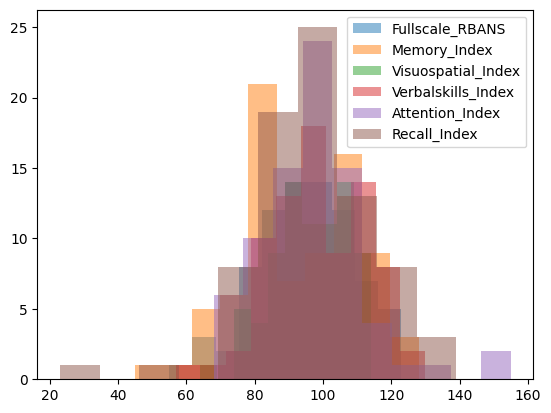

In [26]:
# Make histograms of the collumns distributions
for col in columns_of_interest:
    plt.hist(df[col], bins=10, alpha=0.5, label=col)
plt.legend()
plt.show()

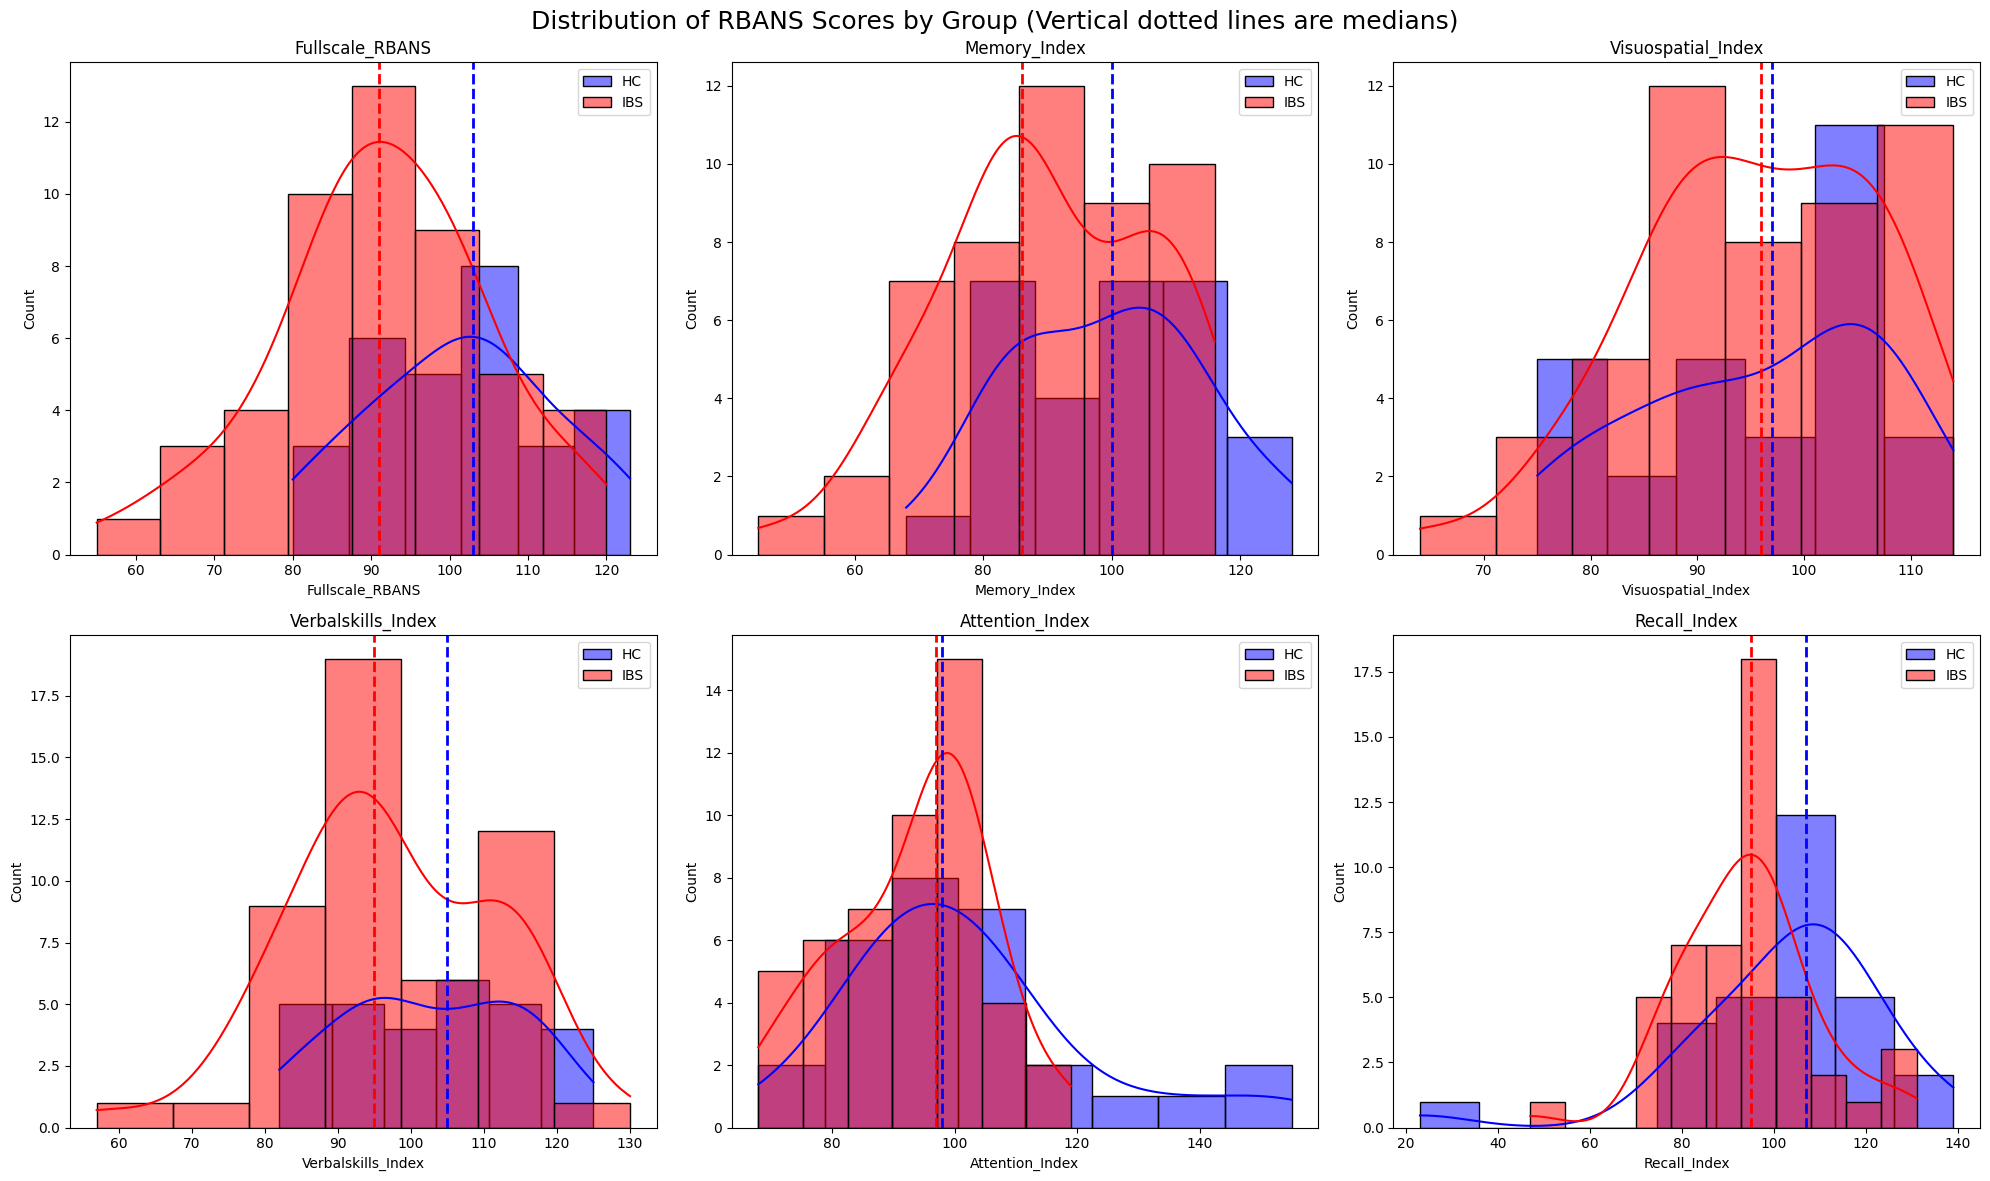

In [27]:
# A more informative plot with 6 panels

# List of columns we're interested in
columns_of_interest = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

# Set up the plot style
#plt.style.use('seaborn')
#sns.set_palette("Set2")

# If you want to reset both matplotlib and seaborn:
plt.rcdefaults()
sns.reset_defaults()

# Create a figure with subplots for each column
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of RBANS Scores by Group (Vertical dotted lines are medians)', fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create histograms for each column
for i, col in enumerate(columns_of_interest):
    ax = axes[i]
    
    # Plot histogram for HC group
    sns.histplot(data=df[df['Group'] == 'HC'], x=col, kde=True, color='blue', alpha=0.5, label='HC', ax=ax)
    
    # Plot histogram for IBS group
    sns.histplot(data=df[df['Group'] == 'IBS'], x=col, kde=True, color='red', alpha=0.5, label='IBS', ax=ax)
    
    ax.set_title(col)
    ax.legend()
    
    # Add mean lines
    #ax.axvline(df_fs[df_fs['Group'] == 'HC'][col].mean(), color='blue', linestyle='dashed', linewidth=2)
    #ax.axvline(df_fs[df_fs['Group'] == 'IBS'][col].mean(), color='red', linestyle='dashed', linewidth=2)

    # Add median lines
    ax.axvline(df[df['Group'] == 'HC'][col].median(), color='blue', linestyle='dashed', linewidth=2)
    ax.axvline(df[df['Group'] == 'IBS'][col].median(), color='red', linestyle='dashed', linewidth=2)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
 

### Compute the correlation matrix of the morphometric measures and the RBANS indices

In [28]:
df.columns

Index(['Subject', 'Group', 'eTIV', 'Left-Cerebellum-White-Matter',
       'Left-Cerebellum-Cortex', 'Left-Thalamus', 'Left-Caudate',
       'Left-Putamen', 'Left-Pallidum', 'Left-Hippocampus', 'Left-Amygdala',
       'Left-Accumbens-area', 'CSF', 'Right-Cerebellum-White-Matter',
       'Right-Cerebellum-Cortex', 'Right-Thalamus', 'Right-Caudate',
       'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus',
       'Right-Amygdala', 'Right-Accumbens-area', 'WM-hypointensities',
       'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior',
       'CC_Anterior', 'BrainSegVol', 'BrainSegVolNotVent', 'lhCortexVol',
       'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol',
       'rhCerebralWhiteMatterVol', 'CerebralWhiteMatterVol', 'SubCortGrayVol',
       'TotalGrayVol', 'Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index',
       'Verbalskills_Index', 'Attention_Index', 'Recall_Index', 'IBS_SSS',
       'Age', 'Gender', 'Education'],
      dtype='object')

<Figure size 1200x1200 with 0 Axes>

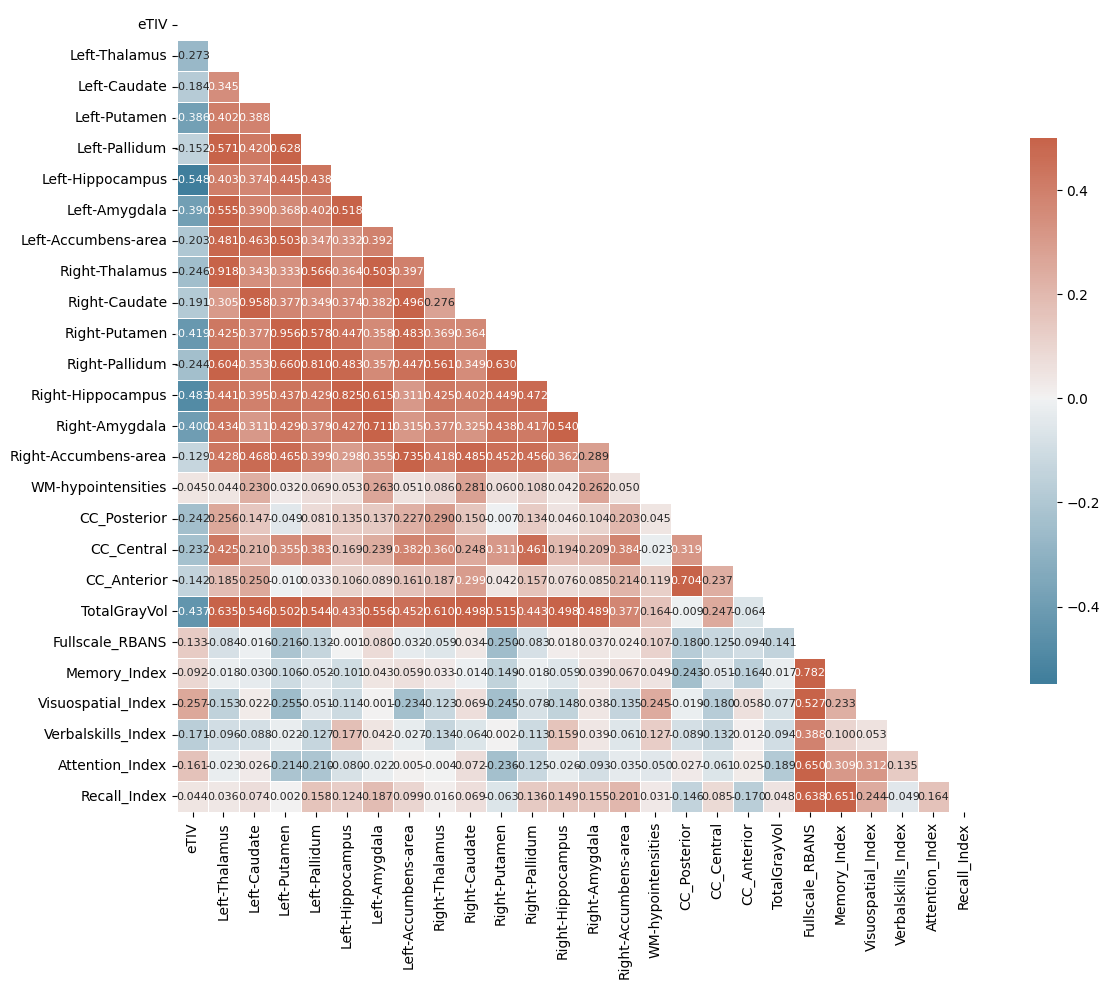

In [29]:
# Compute the correlation matrix
df_X = df.drop(['Subject', 'Group', 'IBS_SSS', 'Age', 'Gender', 'Education',
                   'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
                   'CSF', 'Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 
                   'BrainSegVol', 'BrainSegVolNotVent',
                   'CC_Mid_Posterior', 'CC_Mid_Anterior',
                   'lhCortexVol', 'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol',
                   'rhCerebralWhiteMatterVol', 'CerebralWhiteMatterVol', 'SubCortGrayVol', ], axis=1)
# Select Only Numeric Columns in Pandas
df_X = df_X.select_dtypes(include=np.number)
corr = df_X.corr()  # Pearson correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure with white background
plt.figure(figsize=(12, 12), facecolor='white')
f, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('white')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, fmt='.3f', annot_kws={"size": 8})  # Increased font size and 3 decimal places

# Remove the frame
ax.spines[:].set_visible(False)

plt.tight_layout()
plt.show()

df_X.corr() by default uses Pearson correlation. While Pearson correlation is widely used, there are alternatives that might be more appropriate depending on our data characteristics and research goals. Here are some alternatives to consider:

1. Spearman Rank Correlation:
   - Useful when: data is ordinal, not normally distributed, or has outliers.
   - Advantage: It's less sensitive to outliers and non-linear relationships.
   - How to use: df_X.corr(method='spearman')
   - Argument: Better for capturing monotonic relationships that aren't necessarily linear.

2. Kendall's Tau:
   - Useful when: Having a small sample size or many tied ranks.
   - Advantage: More robust and has a more intuitive interpretation in terms of probabilities.
   - How to use: df_X.corr(method='kendall')
   - Argument: Can be more appropriate than Spearman for smaller datasets.

3. Distance Correlation:
   - Useful when: You want to detect non-linear relationships.
   - Advantage: Can capture non-linear dependencies that Pearson might miss.
   - How to use: Requires a separate implementation, not built into pandas.
   - Argument: Might reveal relationships that other methods miss, especially in complex biological data.

4. Mutual Information:
   - Useful when: You want to capture any kind of statistical dependence, not just linear.
   - Advantage: Can detect both linear and non-linear relationships.
   - How to use: Requires a separate implementation, like sklearn.feature_selection.mutual_info_regression
   - Argument: Particularly useful for complex biological systems where relationships might not be linear.

Given that we are working with brain morphometry and psychological data, which can have complex, non-linear relationships, we should consider using Spearman correlation as a first alternative. It's robust to outliers and can capture monotonic relationships well.

**Pearson** correlation and **Spearman** correlation are both measures of the strength and direction of association between two variables, but they have different assumptions and are used in different scenarios. Here's an explanation of their differences and assumptions:

**Pearson** Correlation:

1. Measures the linear relationship between two continuous variables.
2. Assumptions:
   - Both variables are normally distributed (or approximately normal).
   - The relationship between the variables is linear.
   - There are no significant outliers.
   - Homoscedasticity (equal variances along the line of best fit).

3. Range: -1 to +1, where -1 is a perfect negative linear correlation, 0 is no linear correlation, and +1 is a perfect positive linear correlation.
4. Sensitive to outliers.
5. Uses the raw data values in its calculation.

Spearman Correlation:

1. Measures the monotonic relationship between two variables (which can be continuous or ordinal).
2. Assumptions:
   - The relationship between variables is monotonic (as one variable increases, the other either increases or decreases, but not necessarily at a constant rate).
   - Does not assume normality of the variables.
   - Less sensitive to outliers.

3. Range: -1 to +1, where -1 is a perfect negative monotonic relationship, 0 is no monotonic relationship, and +1 is a perfect positive monotonic relationship.
4. Uses the ranks of the data rather than the raw values in its calculation.
5. Can detect non-linear relationships, as long as they are monotonic.

Key Differences:

1. Type of Relationship: Pearson detects linear relationships, while Spearman can detect any monotonic relationship.
2. Data Type: Pearson is for continuous variables, while Spearman can be used with ordinal data as well.
3. Normality: Pearson assumes normal distribution, Spearman does not.
4. Outliers: Pearson is more sensitive to outliers than Spearman.
5. Calculation: Pearson uses raw data values, Spearman uses ranked data.

When to Use:

- Use Pearson when you have continuous, normally distributed variables and you're specifically interested in linear relationships.
- Use Spearman when:
  - Your data is ordinal
  - You're not sure about the normality of your data
  - You suspect the relationship might be monotonic but not necessarily linear
  - You have outliers that you can't or don't want to remove

In your case, with brain morphometry and cognitive data, Spearman correlation might be more appropriate if you're not certain about the normality of your data or if you suspect there might be non-linear (but still monotonic) relationships between variables. However, it's often useful to compute both and compare the results to get a more comprehensive understanding of the relationships in your data.

#### A more comprehensive function `plot_correlation_matrix(df_fs, method='pearson')` that takes two arguments:

1. df_fs: Our original dataframe<br>
2. method: The correlation method to use ('pearson', 'spearman', 'kendall', or 'mutual_info')<br>

The function handles the data preparation, computes the correlation (or mutual information) matrix, and plots the heatmap.<br>
For the mutual information option, there is implemented a normalized version that scales the mutual information scores to a range (0, 1) similar to correlation coefficients (-1 to 1). <br>
This makes it easier to compare with the other correlation methods visually.

In [49]:
def plot_correlation_matrix(df_fs, method='pearson', save_fig=False):
    # Compute the correlation matrix
    df_X = df.drop(['Subject', 'Group', 'IBS_SSS', 'Age', 'Gender', 'Education',
                       'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
                       'CSF', 'Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 
                       'BrainSegVol', 'BrainSegVolNotVent',
                       'CC_Mid_Posterior', 'CC_Mid_Anterior',
                       'lhCortexVol', 'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol',
                       'rhCerebralWhiteMatterVol', 'CerebralWhiteMatterVol', 'SubCortGrayVol'], axis=1)
    
    # Select Only Numeric Columns in Pandas
    df_X = df_X.select_dtypes(include=np.number)
    
    if method in ['pearson', 'spearman', 'kendall']:
        corr = df_X.corr(method=method)
    elif method == 'mutual_info':
        mi_scores = mutual_info_regression(df_X, df_X.iloc[:, 0])
        corr = pd.DataFrame(index=df_X.columns, columns=df_X.columns)
        for i, col in enumerate(df_X.columns):
            mi_scores = mutual_info_regression(df_X, df_X[col])
            corr[col] = mi_scores / np.sqrt(mi_scores[i] * mi_scores)
    else:
        raise ValueError("Invalid method. Choose 'pearson', 'spearman', 'kendall', or 'mutual_info'")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure with white background
    plt.figure(figsize=(12, 12), facecolor='white')
    f, ax = plt.subplots(figsize=(12, 12))
    ax.set_facecolor('white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
                annot=True, fmt='.3f', annot_kws={"size": 8})

    # Remove the frame
    ax.spines[:].set_visible(False)
    
    if save_fig:
        plt.title(' ')
    else:
        plt.title(f'{method.capitalize()} Correlation Matrix')

    plt.tight_layout()

    if save_fig:
        # Save plot to png file
        plt.savefig(f'../figs/{method}_correlation_matrix_RBANS_ASEG.png')

        # Save png-fig to Overleaf figs directory
        plt.savefig(f'/Users/arvid/Dropbox/Apps/Overleaf/Evaluation_of_brain_morphometry_and_clinical_data_in_IBS_diagnostics/figs/{method}_correlation_matrix_RBANS_ASEG.png')

        # Save plot to high res pdf file
        plt.savefig(f'../figs/{method}_correlation_matrix_RBANS_ASEG.pdf', dpi=300)

    plt.show()

# Usage:
# plot_correlation_matrix(df_fs, method='pearson')
# plot_correlation_matrix(df_fs, method='spearman')
# plot_correlation_matrix(df_fs, method='kendall')
# plot_correlation_matrix(df_fs, method='mutual_info')

<Figure size 1200x1200 with 0 Axes>

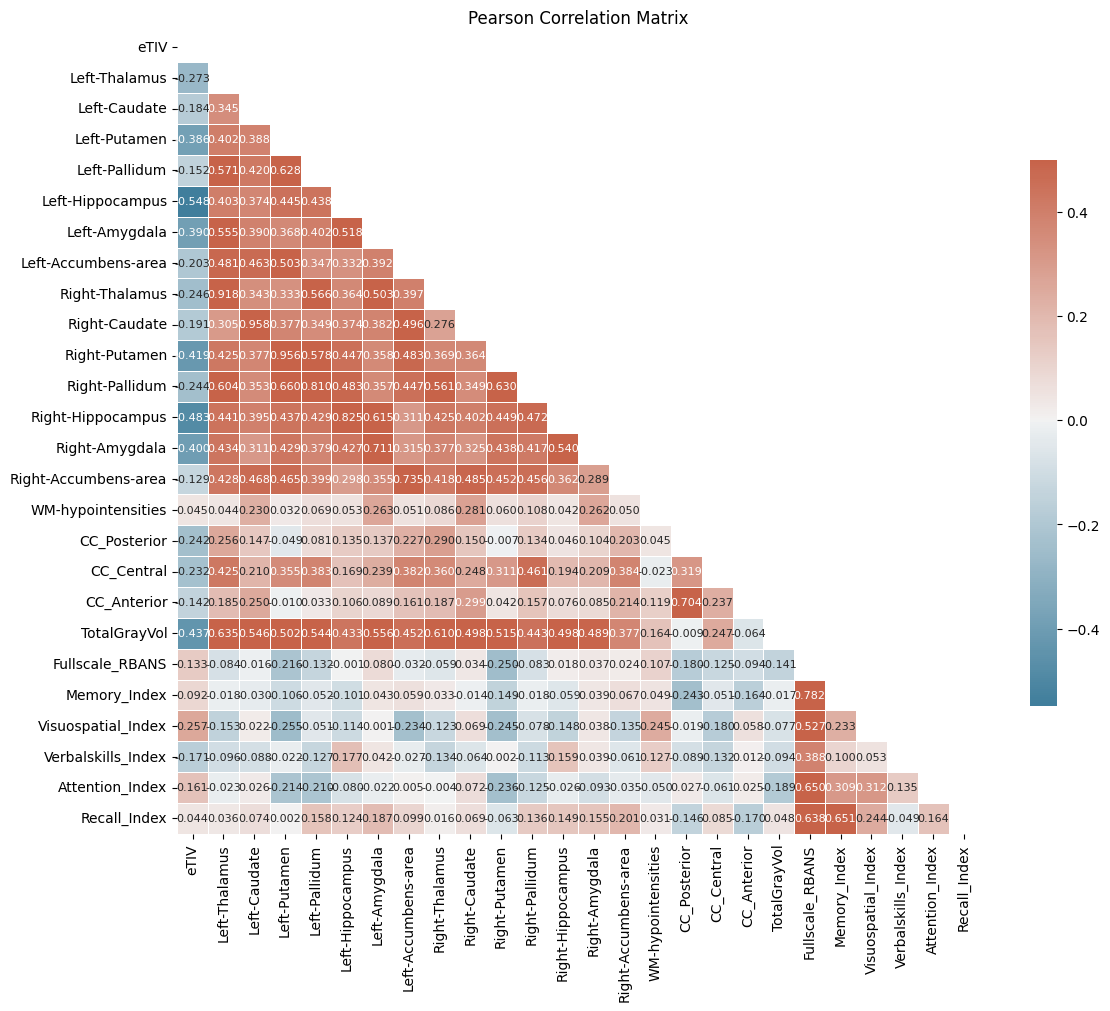

In [50]:
plot_correlation_matrix(df, method='pearson')

<Figure size 1200x1200 with 0 Axes>

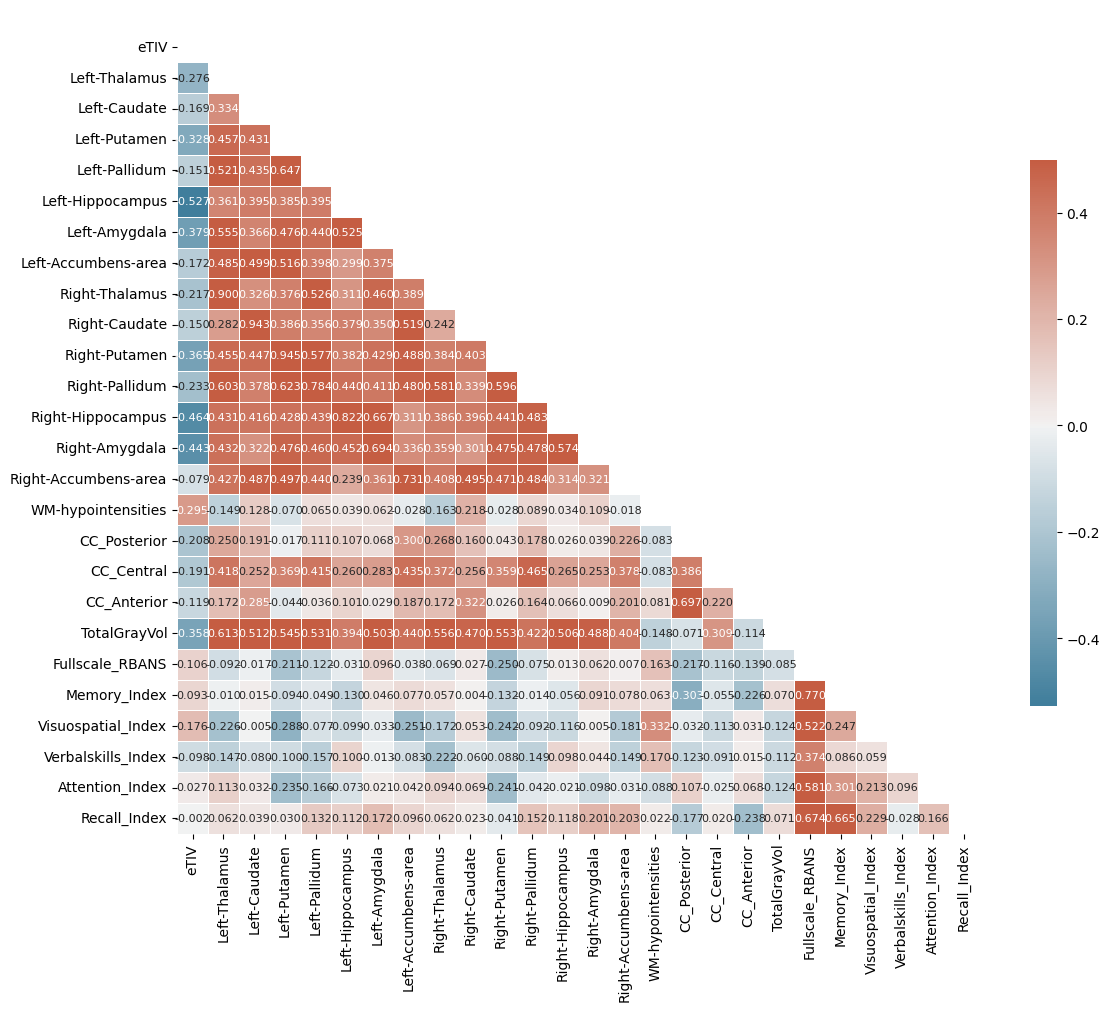

In [51]:
method='spearman'

plot_correlation_matrix(df, method=method, save_fig=True)

<Figure size 1200x1200 with 0 Axes>

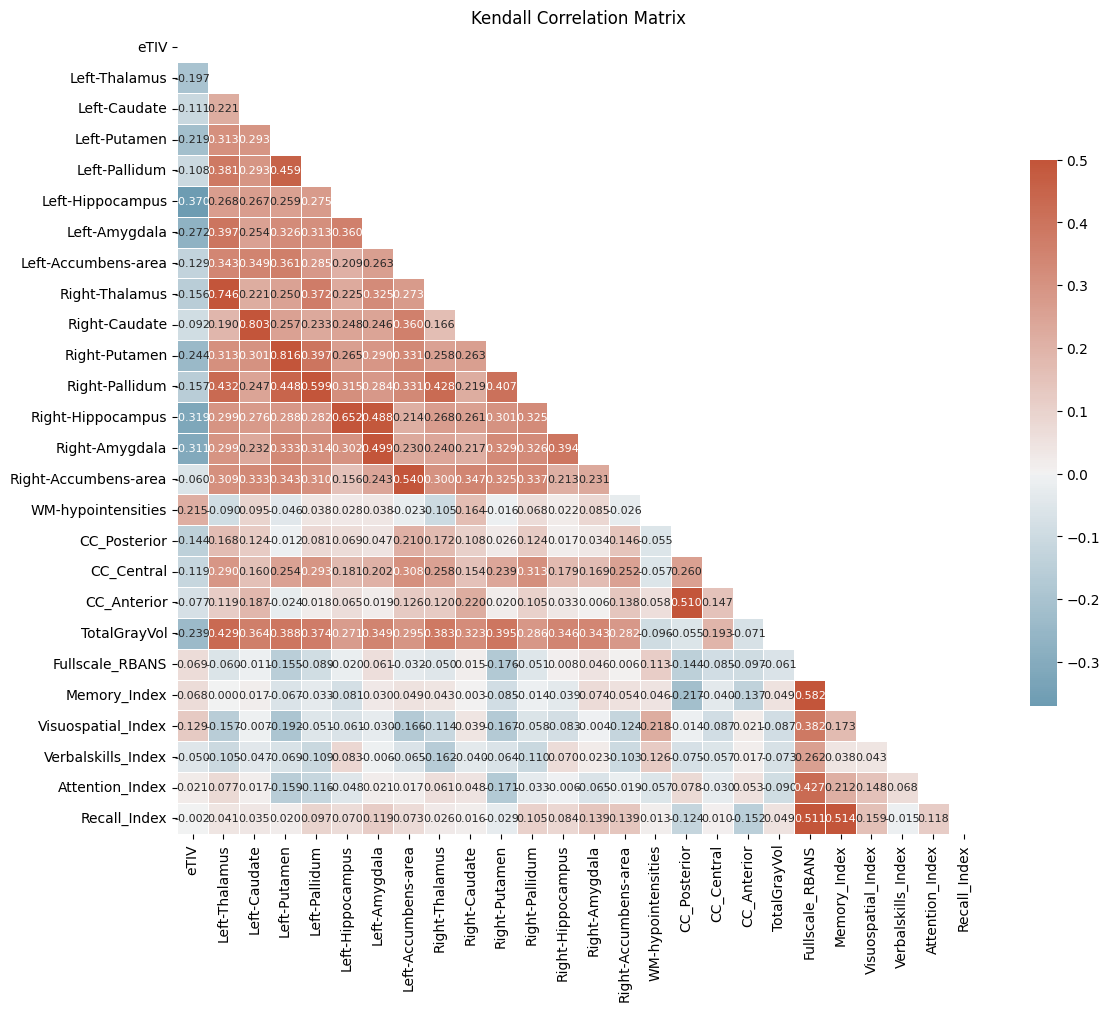

In [52]:
plot_correlation_matrix(df, method='kendall')

<Figure size 1200x1200 with 0 Axes>

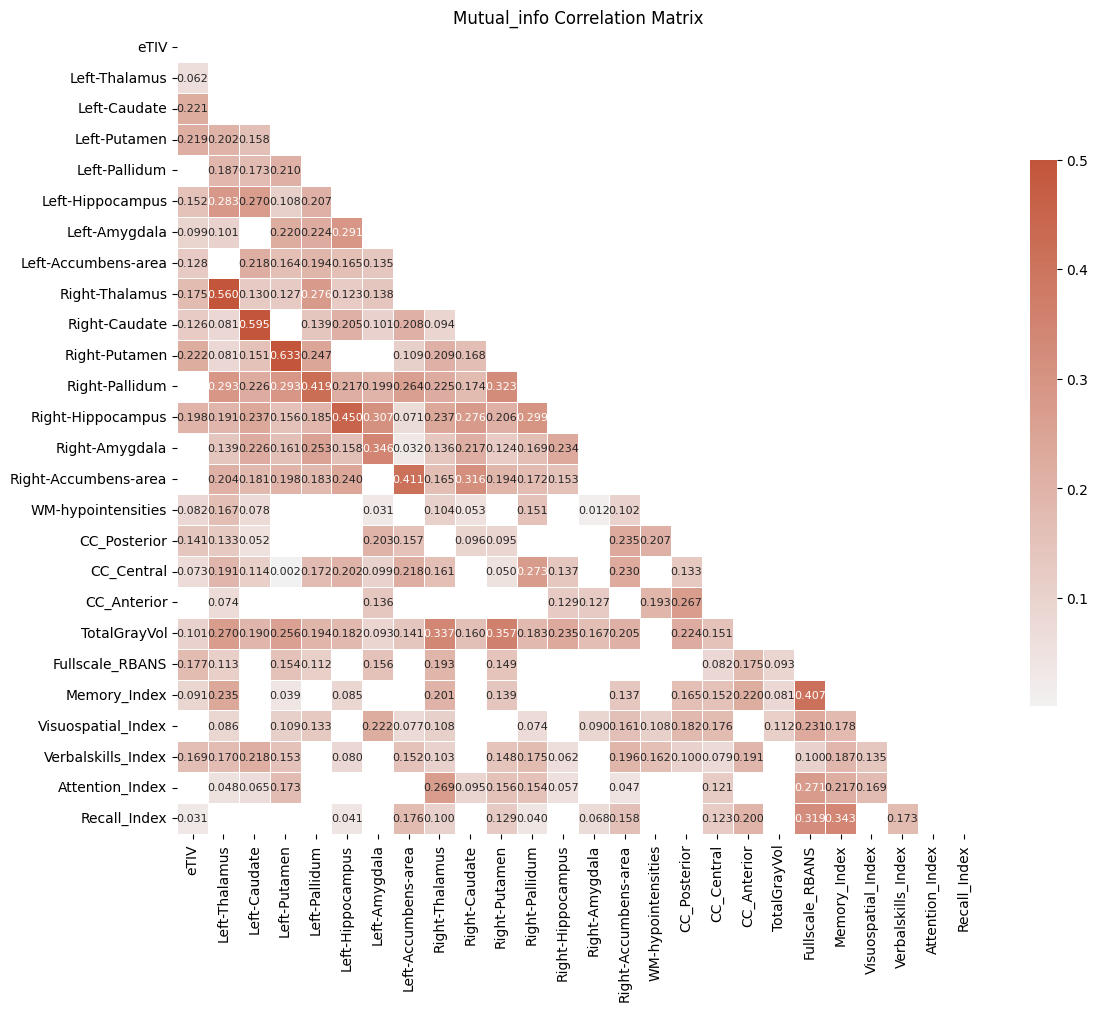

In [53]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
plot_correlation_matrix(df, method='mutual_info')

**The mutual information (MI) method and how to interpret the resulting matrix:**

1. Mutual Information Method:
   The mutual information between two random variables X and Y is defined as:

   I(X;Y) = ∑∑ p(x,y) * log(p(x,y) / (p(x)p(y)))

   Where p(x,y) is the joint probability distribution of X and Y, and p(x) and p(y) are the marginal probability distributions.

2. Implementation Details:
   - We use `mutual_info_regression` from scikit-learn, which estimates MI using a nearest neighbors approach.
   - For each pair of variables, it calculates the MI score.
   - The scores are then normalized to make them more comparable to correlation coefficients:
     normalized_MI = MI / sqrt(MI(X,X) * MI(Y,Y))

3. Interpreting the MI Matrix:
   - Values range from 0 to 1 (after normalization).
   - 0 indicates no mutual information (variables are independent).
   - Higher values indicate stronger relationships, but don't specify the nature (linear/non-linear) or direction of the relationship.

4. Comparing to Other Correlation Methods:
   - MI can detect both linear and non-linear relationships.
   - It's symmetric (MI(X,Y) = MI(Y,X)), like correlation coefficients.
   - Unlike Pearson correlation, it doesn't assume a linear relationship or normal distribution.

5. Analyzing the MI Matrix:
   - Look for high values, which indicate strong dependencies between variables.
   - Compare with Pearson/Spearman correlations:
     - If MI is high but correlation is low, it might indicate a non-linear relationship.
     - If both are high, it suggests a strong, possibly linear relationship.

6. Potential Findings:
   - Brain regions that show high MI but low linear correlation might have complex, non-linear relationships.
   - RBANS indices with high MI to certain brain structures could indicate important but potentially non-linear cognitive-structural relationships.
   - Clusters of high MI values might reveal groups of brain structures or cognitive measures that are strongly interrelated in complex ways.

7. Limitations and Considerations:
   - MI doesn't provide information about the nature of the relationship (positive/negative, linear/non-linear).
   - It can be sensitive to the choice of estimation method and parameters.
   - Interpreting MI values requires careful consideration of the biological and cognitive context.

8. Next Steps in Analysis:
   - Identify pairs of variables with high MI but low linear correlation for further investigation.
   - Consider using scatter plots or more advanced techniques (e.g., MINE algorithm) to visualize and characterize the nature of these relationships.
   - Use MI findings to guide feature selection in subsequent machine learning models, as it can identify important non-linear relationships.

By examining the MI matrix alongside traditional correlation matrices, you can gain a more comprehensive understanding of the relationships in your neuromorphological and cognitive data, potentially uncovering complex interactions that might be missed by linear methods alone.

A break down how the **mutual information** method applies to our specific case with brain morphometry and cognitive data:

1. Variables X and Y:
   In our dataset, X and Y represent different brain regions or cognitive measures. For example:
   - X could be 'Left-Thalamus' volume
   - Y could be 'Fullscale_RBANS' score

2. Probability Distributions:
   - p(x) is the probability distribution of a specific brain region's volume or a cognitive score
   - p(y) is the probability distribution of another brain region's volume or cognitive score
   - p(x,y) is the joint probability of observing specific values for both variables together

3. Calculation Process:
   - The function estimates these probabilities using the data points in our dataset
   - It then calculates the logarithm of the ratio between the joint probability and the product of marginal probabilities
   - This is summed over all possible values of X and Y

4. Interpretation in Your Context:
   - High MI value: Indicates a strong relationship between two brain regions or between a brain region and a cognitive measure. This could suggest:
     * Structural co-variation between brain regions
     * A potential link between brain structure and cognitive function
   - Low MI value: Suggests relative independence between the variables

5. Advantages for Our Data:
   - Can detect non-linear relationships, which is crucial in neuroscience where relationships are often complex
   - Doesn't assume normal distribution, which is beneficial as brain volumes and cognitive scores may not always be normally distributed

6. Specific Examples:
   - High MI between 'Left-Hippocampus' and 'Memory_Index' might indicate a strong (possibly non-linear) relationship between hippocampal volume and memory performance
   - High MI between 'Left-Thalamus' and 'Right-Thalamus' could indicate strong bilateral structural correlation

7. Normalization in Our Code:
   The normalization step (dividing by sqrt(MI(X,X) * MI(Y,Y))) scales the MI to a range similar to correlation coefficients, making it easier to compare with other measures and interpret in the context of your study.

8. Relevance to IBS Study:
   - Can help identify brain regions or cognitive measures that are most informative about IBS status
   - Might reveal complex relationships between brain structure, cognitive function, and IBS symptoms that aren't captured by linear correlations

By applying this method to our data, we are essentially quantifying the amount of information shared between different aspects of brain structure and cognitive function, potentially uncovering important relationships that could provide insights into the neurological and cognitive aspects of IBS.

In [54]:
def compute_mi_matrix(df):
    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            if i != j:
                mi_score = mutual_info_regression(df[[col1]], df[col2])[0]
                mi_matrix.loc[col1, col2] = mi_score / np.sqrt(mutual_info_regression(df[[col1]], df[col1])[0] * mutual_info_regression(df[[col2]], df[col2])[0])
            else:
                mi_matrix.loc[col1, col2] = 1.0
    return mi_matrix

def compute_mi_matrix2(df):
    mi_scores = mutual_info_regression(df, df.iloc[:, 0])
    corr = pd.DataFrame(index=df.columns, columns=df.columns)
    for i, col in enumerate(df.columns):
        mi_scores = mutual_info_regression(df, df[col])
        corr[col] = mi_scores / np.sqrt(mi_scores[i] * mi_scores)
    return corr

# Recompute MI matrix
mi_matrix = compute_mi_matrix2(df_X)

# Compute Pearson correlation matrix
pearson_matrix = df_X.corr(method='pearson')

In [37]:
def find_interesting_pairs(mi_matrix, pearson_matrix, mi_threshold=0.2, corr_threshold=0.1):
    interesting_pairs = []
    for i in range(len(mi_matrix.columns)):
        for j in range(i+1, len(mi_matrix.columns)):
            mi = mi_matrix.iloc[i, j]
            corr = abs(pearson_matrix.iloc[i, j])
            if not np.isnan(mi) and not np.isnan(corr):
                if mi > mi_threshold and corr < corr_threshold:
                    interesting_pairs.append((mi_matrix.columns[i], mi_matrix.columns[j], mi, corr))
    return sorted(interesting_pairs, key=lambda x: x[2] - x[3], reverse=True)

interesting_pairs = find_interesting_pairs(mi_matrix, pearson_matrix)

In [38]:
print("Top pairs with high MI but low linear correlation:")
for pair in interesting_pairs[:10]:  # Print top 10
    print(f"{pair[0]} - {pair[1]}: MI = {pair[2]:.3f}, Corr = {pair[3]:.3f}")

Top pairs with high MI but low linear correlation:
Left-Amygdala - Visuospatial_Index: MI = 0.279, Corr = 0.001
Right-Thalamus - Attention_Index: MI = 0.273, Corr = 0.004
Left-Thalamus - Memory_Index: MI = 0.253, Corr = 0.018
CC_Anterior - Verbalskills_Index: MI = 0.230, Corr = 0.012
CC_Posterior - TotalGrayVol: MI = 0.224, Corr = 0.009
CC_Posterior - Visuospatial_Index: MI = 0.211, Corr = 0.019
Right-Thalamus - Memory_Index: MI = 0.209, Corr = 0.033
WM-hypointensities - CC_Posterior: MI = 0.207, Corr = 0.045
Right-Accumbens-area - Verbalskills_Index: MI = 0.210, Corr = 0.061
Left-Caudate - Verbalskills_Index: MI = 0.235, Corr = 0.088


In [55]:
all_pairs = []
for i in range(len(mi_matrix.columns)):
    for j in range(i+1, len(mi_matrix.columns)):
        mi = mi_matrix.iloc[i, j]
        corr = abs(pearson_matrix.iloc[i, j])
        if not np.isnan(mi) and not np.isnan(corr):
            all_pairs.append((mi_matrix.columns[i], mi_matrix.columns[j], mi, corr))

all_pairs.sort(key=lambda x: x[2] - x[3], reverse=True)

print("All pairs sorted by MI - Correlation:")
for pair in all_pairs[:40]:  # Print top 40
    print(f"{pair[0]} - {pair[1]}: MI = {pair[2]:.3f}, Corr = {pair[3]:.3f}")

All pairs sorted by MI - Correlation:
Right-Thalamus - Attention_Index: MI = 0.275, Corr = 0.004
Left-Amygdala - Visuospatial_Index: MI = 0.251, Corr = 0.001
Left-Thalamus - Memory_Index: MI = 0.240, Corr = 0.018
CC_Posterior - TotalGrayVol: MI = 0.224, Corr = 0.009
CC_Posterior - Visuospatial_Index: MI = 0.218, Corr = 0.019
CC_Anterior - Verbalskills_Index: MI = 0.203, Corr = 0.012
Right-Thalamus - Memory_Index: MI = 0.210, Corr = 0.033
WM-hypointensities - CC_Posterior: MI = 0.207, Corr = 0.045
Left-Caudate - Verbalskills_Index: MI = 0.239, Corr = 0.088
Right-Putamen - Verbalskills_Index: MI = 0.145, Corr = 0.002
Right-Thalamus - Fullscale_RBANS: MI = 0.194, Corr = 0.059
Left-Accumbens-area - Verbalskills_Index: MI = 0.155, Corr = 0.027
Left-Thalamus - WM-hypointensities: MI = 0.167, Corr = 0.044
Left-Pallidum - Visuospatial_Index: MI = 0.171, Corr = 0.051
Left-Putamen - Verbalskills_Index: MI = 0.142, Corr = 0.022
Right-Accumbens-area - Verbalskills_Index: MI = 0.176, Corr = 0.061
L

### Checking RBANS features between groups

In [56]:
import pandas as pd
import numpy as np
from scipy import stats

# List of variables we're interested in
variables = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

# Function to calculate median and IQR
def median_iqr(x):
    return f"{np.median(x):.1f} ({np.percentile(x, 25):.1f}-{np.percentile(x, 75):.1f})"

# Calculate median and IQR for each group
results = df.groupby('Group')[variables].agg(median_iqr).T

# Perform Mann-Whitney U test for each variable
p_values = []
for var in variables:
    _, p = stats.mannwhitneyu(df[df['Group'] == 'HC'][var], 
                              df[df['Group'] == 'IBS'][var])
    p_values.append(f"{p:.3f}")

# Add p-values to results
results['p-value'] = p_values

# Create LaTeX table
latex_table = results.to_latex(escape=False)
latex_table = latex_table.replace("\\begin{tabular}", "\\begin{tabular}[t]{lllr}")
latex_table = latex_table.replace("\\begin{table}", "\\begin{table}[ht]\n\\caption{Median (IQR) of RBANS scores. P-values from Mann-Whitney U test.}")

# Create Markdown table
md_table = "# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test.\n\n"
md_table += "| Variable | HC | IBS | p-value |\n"
md_table += "|----------|----|----|--------|\n"
for index, row in results.iterrows():
    md_table += f"| {index} | {row['HC']} | {row['IBS']} | {row['p-value']} |\n"

# Print LaTeX table
print("LaTeX Table:")
print(latex_table)

# Print Markdown table
print("\nMarkdown Table:")
print(md_table)

LaTeX Table:
\begin{tabular}[t]{lllr}{llll}
\toprule
Group & HC & IBS & p-value \\
\midrule
Fullscale_RBANS & 103.0 (93.0-108.0) & 91.0 (85.0-100.0) & 0.002 \\
Memory_Index & 100.0 (86.0-109.0) & 86.0 (81.0-105.0) & 0.031 \\
Visuospatial_Index & 97.0 (90.0-107.0) & 96.0 (90.0-105.0) & 0.763 \\
Verbalskills_Index & 105.0 (95.0-113.0) & 95.0 (89.0-111.0) & 0.087 \\
Attention_Index & 98.0 (89.0-108.0) & 97.0 (83.0-101.0) & 0.118 \\
Recall_Index & 107.0 (92.0-113.0) & 95.0 (85.0-100.0) & 0.006 \\
\bottomrule
\end{tabular}


Markdown Table:
# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test.

| Variable | HC | IBS | p-value |
|----------|----|----|--------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.002 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.031 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96.0 (90.0-105.0) | 0.763 |
| Verbalskills_Index | 105.0 (95.0-113.0) | 95.0 (89.0-111.0) | 0.087 |
| Attention_Index | 98.0 (89.0-108.0) | 97.0 (

Markdown Table:<br>
**Median (IQR) of RBANS scores. P-values from Mann-Whitney U test.**<br>

| Variable | HC | IBS | p-value |
|----------|----|----|--------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.002 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.031 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96.0 (90.0-105.0) | 0.763 |
| Verbalskills_Index | 105.0 (95.0-113.0) | 95.0 (89.0-111.0) | 0.087 |
| Attention_Index | 98.0 (89.0-108.0) | 97.0 (83.0-101.0) | 0.118 |
| Recall_Index | 107.0 (92.0-113.0) | 95.0 (85.0-100.0) | 0.006 |

It is possible to compute effect sizes using a non-parametric approach. One common non-parametric effect size measure is **Cliff's delta**. It's particularly useful when you can't assume normality in your data distribution.

A brief explanation of Cliff's delta:

Cliff's delta is a non-parametric effect size measure that quantifies the amount of difference between two groups of observations. Some key points about Cliff's delta:

1. Range: It ranges from -1 to +1.

2. Interpretation: 
   - A value of +1 indicates that all values in one group are higher than all values in the other group.
   - A value of -1 indicates that all values in one group are lower than all values in the other group.
   - A value of 0 indicates complete overlap between the two groups.

3. Magnitude guidelines:
   - |d| < 0.147: negligible effect
   - 0.147 ≤ |d| < 0.33: small effect
   - 0.33 ≤ |d| < 0.474: medium effect
   - |d| ≥ 0.474: large effect

4. Advantages:
   - It doesn't assume normality or homogeneity of variance.
   - It's suitable for ordinal data and doesn't require interval scaling.

5. Calculation: It's based on the probability that a randomly selected observation from one group is greater than a randomly selected observation from another group, minus the reverse probability.

6. Use case: It's particularly useful when dealing with non-normal distributions or when you want to avoid assumptions about the underlying distribution of the data.

Cliff's delta provides a robust measure of the difference between two groups, making it a valuable tool in situations where parametric measures like Cohen's d might not be appropriate.

Here is how to calculate Cliff's delta for each of your variables:

In [57]:
import numpy as np
import pandas as pd
from scipy import stats

def cliffs_delta(x, y):
    return stats.mannwhitneyu(x, y).statistic / (len(x) * len(y)) - 0.5

variables = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

results = []

for var in variables:
    hc_data = df[df['Group'] == 'HC'][var]
    ibs_data = df[df['Group'] == 'IBS'][var]
    
    # Calculate median and IQR
    hc_median_iqr = f"{np.median(hc_data):.1f} ({np.percentile(hc_data, 25):.1f}-{np.percentile(hc_data, 75):.1f})"
    ibs_median_iqr = f"{np.median(ibs_data):.1f} ({np.percentile(ibs_data, 25):.1f}-{np.percentile(ibs_data, 75):.1f})"
    
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(hc_data, ibs_data)
    
    # Calculate Cliff's delta
    delta = cliffs_delta(hc_data, ibs_data)
    
    results.append([var, hc_median_iqr, ibs_median_iqr, f"{p_value:.3f}", f"{delta:.3f}"])

# Create DataFrame
df_results = pd.DataFrame(results, columns=['Variable', 'HC', 'IBS', 'p-value', 'Cliffs_delta'])

# Create LaTeX table
latex_table = df_results.to_latex(index=False, escape=False)
latex_table = latex_table.replace('\\begin{tabular}', '\\begin{tabular}[t]{lllrr}')
latex_table = latex_table.replace('\\begin{table}', '\\begin{table}[ht]\n\\caption{Median (IQR) of RBANS scores. P-values from Mann-Whitney U test. Effect size: Cliff\'s delta.}')

# Create Markdown table
md_table = "# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test. Effect size: Cliff's delta.\n\n"
md_table += "| Variable | HC | IBS | p-value | Cliff's delta |\n"
md_table += "|----------|----|----|--------|---------------|\n"
for _, row in df_results.iterrows():
    md_table += f"| {row['Variable']} | {row['HC']} | {row['IBS']} | {row['p-value']} | {row['Cliffs_delta']} |\n"

# Print LaTeX table
print("LaTeX Table:")
print(latex_table)

# Print Markdown table
print("\nMarkdown Table:")
print(md_table)

LaTeX Table:
\begin{tabular}[t]{lllrr}{lllll}
\toprule
Variable & HC & IBS & p-value & Cliffs_delta \\
\midrule
Fullscale_RBANS & 103.0 (93.0-108.0) & 91.0 (85.0-100.0) & 0.002 & 0.213 \\
Memory_Index & 100.0 (86.0-109.0) & 86.0 (81.0-105.0) & 0.031 & 0.147 \\
Visuospatial_Index & 97.0 (90.0-107.0) & 96.0 (90.0-105.0) & 0.763 & 0.021 \\
Verbalskills_Index & 105.0 (95.0-113.0) & 95.0 (89.0-111.0) & 0.087 & 0.116 \\
Attention_Index & 98.0 (89.0-108.0) & 97.0 (83.0-101.0) & 0.118 & 0.107 \\
Recall_Index & 107.0 (92.0-113.0) & 95.0 (85.0-100.0) & 0.006 & 0.186 \\
\bottomrule
\end{tabular}


Markdown Table:
# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test. Effect size: Cliff's delta.

| Variable | HC | IBS | p-value | Cliff's delta |
|----------|----|----|--------|---------------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.002 | 0.213 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.031 | 0.147 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96

Markdown Table:<br>
**Median (IQR) of RBANS scores. P-values from Mann-Whitney U test. Effect size: Cliff's delta.**<br>

| Variable | HC | IBS | p-value | Cliff's delta |
|----------|----|----|--------|---------------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.002 | 0.213 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.031 | 0.147 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96.0 (90.0-105.0) | 0.763 | 0.021 |
| Verbalskills_Index | 105.0 (95.0-113.0) | 95.0 (89.0-111.0) | 0.087 | 0.116 |
| Attention_Index | 98.0 (89.0-108.0) | 97.0 (83.0-101.0) | 0.118 | 0.107 |
| Recall_Index | 107.0 (92.0-113.0) | 95.0 (85.0-100.0) | 0.006 | 0.186 |

And with Bonferroni correction:

In [60]:
import numpy as np
import pandas as pd
from scipy import stats

def cliffs_delta(x, y):
    return stats.mannwhitneyu(x, y).statistic / (len(x) * len(y)) - 0.5

variables = ['Fullscale_RBANS', 'Memory_Index', 'Visuospatial_Index', 'Verbalskills_Index', 'Attention_Index', 'Recall_Index']

# Number of comparisons for Bonferroni correction
n_comparisons = len(variables)
results = []

for var in variables:
    hc_data = df[df['Group'] == 'HC'][var]
    ibs_data = df[df['Group'] == 'IBS'][var]
    
    # Calculate median and IQR
    hc_median_iqr = f"{np.median(hc_data):.1f} ({np.percentile(hc_data, 25):.1f}-{np.percentile(hc_data, 75):.1f})"
    ibs_median_iqr = f"{np.median(ibs_data):.1f} ({np.percentile(ibs_data, 25):.1f}-{np.percentile(ibs_data, 75):.1f})"
    
    # Perform Mann-Whitney U test and apply Bonferroni correction
    statistic, p_value = stats.mannwhitneyu(hc_data, ibs_data)
    p_value_corrected = min(p_value * n_comparisons, 1.0)
    
    # Calculate Cliff's delta
    delta = cliffs_delta(hc_data, ibs_data)
    
    results.append([var, hc_median_iqr, ibs_median_iqr, f"{p_value_corrected:.3f}", f"{delta:.3f}"])

# Create DataFrame
df_results = pd.DataFrame(results, columns=['Variable', 'HC', 'IBS', 'p-value', 'Cliffs_delta'])

# Create Markdown table
md_table = "# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test (Bonferroni-corrected). Effect size: Cliff's delta.\n\n"
md_table += "| Variable | HC | IBS | p-value | Cliff's delta |\n"
md_table += "|----------|----|----|---------|---------------|\n"
for _, row in df_results.iterrows():
    md_table += f"| {row['Variable']} | {row['HC']} | {row['IBS']} | {row['p-value']} | {row['Cliffs_delta']} |\n"

print(md_table)

# Median (IQR) of RBANS scores. P-values from Mann-Whitney U test (Bonferroni-corrected). Effect size: Cliff's delta.

| Variable | HC | IBS | p-value | Cliff's delta |
|----------|----|----|---------|---------------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.011 | 0.213 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.187 | 0.147 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96.0 (90.0-105.0) | 1.000 | 0.021 |
| Verbalskills_Index | 105.0 (95.0-113.0) | 95.0 (89.0-111.0) | 0.524 | 0.116 |
| Attention_Index | 98.0 (89.0-108.0) | 97.0 (83.0-101.0) | 0.709 | 0.107 |
| Recall_Index | 107.0 (92.0-113.0) | 95.0 (85.0-100.0) | 0.038 | 0.186 |



This produces the following table:

**Median (IQR) of RBANS scores. P-values from Mann-Whitney U test (Bonferroni-corrected). Effect size: Cliff's delta.**<br>

| Variable | HC | IBS | p-value | Cliff's delta |
|----------|----|----|---------|---------------|
| Fullscale_RBANS | 103.0 (93.0-108.0) | 91.0 (85.0-100.0) | 0.012 | 0.213 |
| Memory_Index | 100.0 (86.0-109.0) | 86.0 (81.0-105.0) | 0.186 | 0.147 |
| Visuospatial_Index | 97.0 (90.0-107.0) | 96.0 (90.0-105.0) | 1.000 | 0.021 |
| Verbalskills_Index | 105.0 (95.0-113.0) | 95.0 (89.0-111.0) | 0.522 | 0.116 |
| Attention_Index | 98.0 (89.0-108.0) | 97.0 (83.0-101.0) | 0.708 | 0.107 |
| Recall_Index | 107.0 (92.0-113.0) | 95.0 (85.0-100.0) | 0.036 | 0.186 |

After Bonferroni correction, only the Fullscale_RBANS (p = 0.012) and Recall_Index (p = 0.036) remain statistically significant at the α = 0.05 level, demonstrating the importance of controlling for multiple comparisons in statistical analyses.
